In [2]:
import pandas as pd
test_data = pd.read_csv("test_data.csv")

In [10]:
classes_index = {
    1 : "Depressed",
    0 : "Not depressed"
}
from tensorflow import keras
import pickle, os
model = keras.models.load_model('best_weights.hdf5')

'\nif not os.path.isfile(\'tokenizer_BiGlove.pickle\'):\n    with open(\'tokenizer_BiGlove.pickle\', \'rb\') as handle:\n        tokenizer = pickle.load(handle)\nelse:\n    pickle.dump(result, open(\'tokenizer_BiGlove.pickle\',"wb") ) \n'

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
t = Tokenizer()
def predict_tweet_BiGlove(text_to_predict):
    test_sequence = t.texts_to_sequences(text_to_predict)
    test_data = pad_sequences(test_sequence, maxlen=74)
    predictions = model.predict(test_data)
    prediction = np.argmax(predictions)
    print(predictions[0][0])
    if(predictions[0][0] > predictions[0][1]):
        res = 0
    else:
        res = 1
    print("The person who tweeted this is {}\n".format(classes_index[res]))
    ranking = predictions.argsort()[-2:][::-1]
    for i in reversed(range(0, 2)):
        rank = ranking[0][i]
        print("{:>10} : {:.5f}%".format(classes_index[rank], predictions[0][rank]*100))

In [35]:
for i in range(0,40):
    print(test_data["Tweet"][i])
    print()
    predict_tweet_BiGlove(test_data["Tweet"][i])
    print("*************************************************************************************")

@SpottieWiFi @betty_nft Lucky you!!!

2/2 [==============================] - 0s 14ms/step
0.52703923
The person who tweeted this is Not depressed

Not depressed : 52.70392%
 Depressed : 47.29607%
*************************************************************************************
semanas chovendo quase todo dia e hj fzd 30° deus abençoe

2/2 [==============================] - 0s 71ms/step
0.52703923
The person who tweeted this is Not depressed

Not depressed : 52.70392%
 Depressed : 47.29607%
*************************************************************************************
@MickyBeisenherz @saschalobo Es ist wichtig, sich mit diesen Themen auseinanderzusetzen und mögliche Konsequenzen zu diskutieren, um sicherzustellen, dass wir verantwortungsvoll und ethisch mit der Entwicklung und Implementierung von Technologie umgehen.

8/8 [==============================] - 1s 75ms/step
0.52703923
The person who tweeted this is Not depressed

Not depressed : 52.70392%
 Depressed : 47.29607%
*

8/8 [==============================] - 1s 63ms/step
0.52703923
The person who tweeted this is Not depressed

Not depressed : 52.70392%
 Depressed : 47.29607%
*************************************************************************************
@pants420_banana I have a friend who volunteers for Take 10 on Courtenay Pl, and he said that the paramedics are having to de-escalate the cops they are assigned to. Stop putting cops in community support roles!

7/7 [==============================] - 0s 61ms/step
0.52703923
The person who tweeted this is Not depressed

Not depressed : 52.70392%
 Depressed : 47.29607%
*************************************************************************************
Good morning folks!! Have an awesome day! Watch something good! #goodvibes #filmcritic #film #movies  https://t.co/BerBvhgQ6i

4/4 [==============================] - 0s 68ms/step
0.52703923
The person who tweeted this is Not depressed

Not depressed : 52.70392%
 Depressed : 47.29607%
**************

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np 
from tqdm import trange
from tensorflow.keras.utils import to_categorical
def evaluate_test(data):
    d=data["Tweet"].tolist()  
    sequences = t.texts_to_sequences(d)
    seqs = pad_sequences(sequences, maxlen=74)
    y = to_categorical(data["label"].tolist())
    score = model.evaluate(seqs,y, verbose=2)
    print('Test accuracy:', score[ 1 ])
    Y_pred = model.predict(seqs)
    y_pred = np.argmax(Y_pred, axis=1)
    y_classes = np.argmax(y, axis=1)
    target_names = [ 'Depressed', 'Not depressed' ]
    print(confusion_matrix(y_classes, y_pred) )
    print(classification_report(y_classes, y_pred, target_names=target_names))

In [41]:
%%time
evaluate_test(test_data)

313/313 - 23s - loss: 0.6946 - acc: 0.5000 - 23s/epoch - 74ms/step
Test accuracy: 0.5
313/313 [==============================] - 26s 82ms/step
[[4999    0]
 [4999    0]]
               precision    recall  f1-score   support

    Depressed       0.50      1.00      0.67      4999
Not depressed       0.00      0.00      0.00      4999

     accuracy                           0.50      9998
    macro avg       0.25      0.50      0.33      9998
 weighted avg       0.25      0.50      0.33      9998

CPU times: total: 1min 40s
Wall time: 49.5 s


c:\users\nithy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nithy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nithy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [45]:
cf_matrix = [[386,249], [169,570]]

<AxesSubplot:>

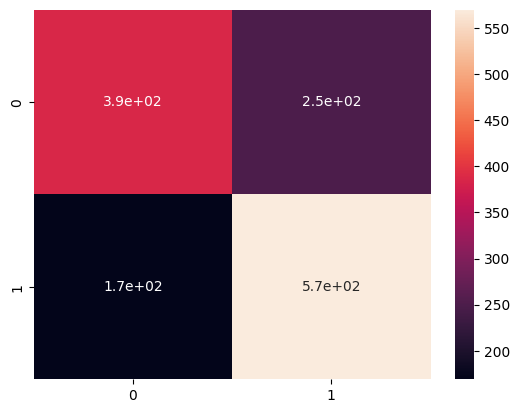

In [46]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)